{'aphA': 671, 'appA': 116, 'gcd': 1156, 'olpA': 199, 'phnC': 42673, 'phnD': 1382, 'phnE': 3150, 'phnG': 2060, 'phnH': 1522, 'phnI': 1576, 'phnJ': 1422, 'phnK': 12589, 'phnL': 5201, 'phnM': 1353, 'phnW': 4415, 'phnX': 3712, 'phoA': 2153, 'phoB': 24015, 'phoC': 72, 'phoD': 2469, 'phoN': 237, 'phoR': 7521, 'phoX': 3488, 'phy': 386, 'pit': 3280, 'ppk': 14412, 'ppx': 6015, 'pstA': 10055, 'pstB': 35371, 'pstC': 10293, 'pstS': 11229}
total: 214193


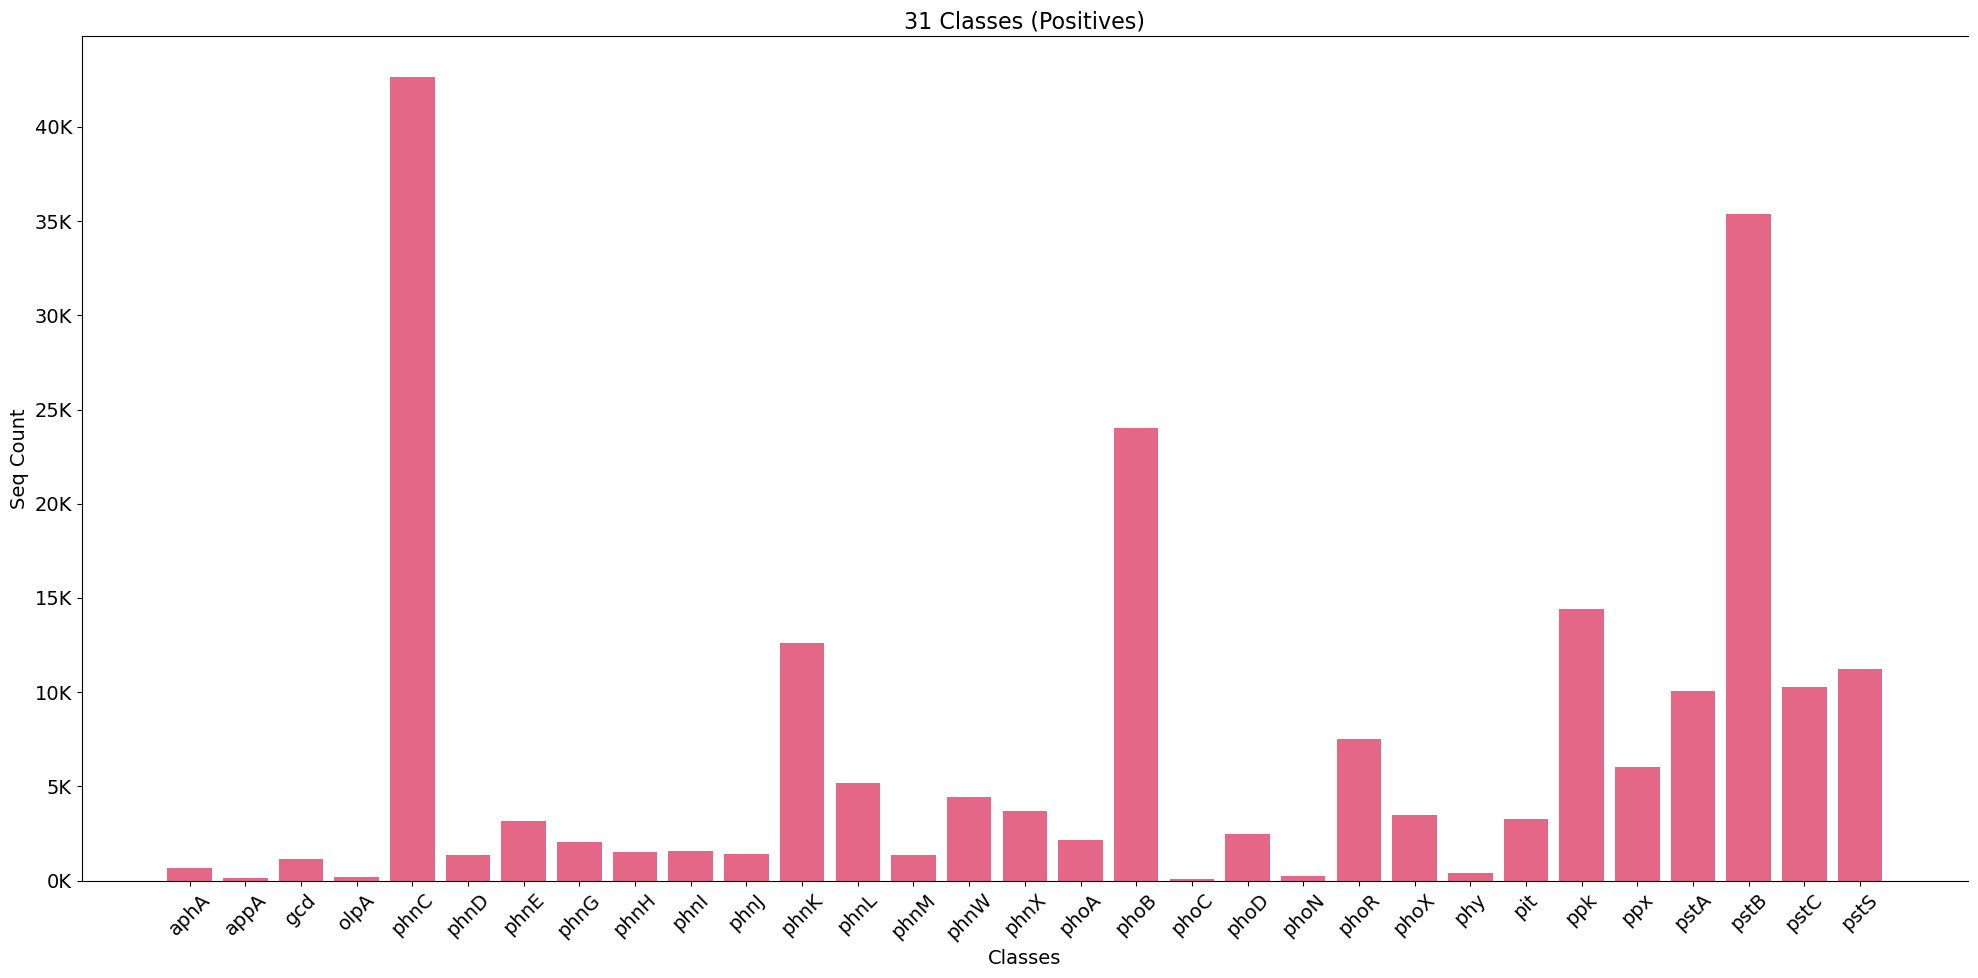

In [1]:
# 正样本分布
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.size'] = 14

labels = [
    "aphA", "appA", "gcd", "olpA", "phnC",
    "phnD", "phnE", "phnG", "phnH", "phnI",
    "phnJ", "phnK", "phnL", "phnM", "phnW", 
    "phnX", "phoA", "phoB", "phoC", "phoD", 
    "phoN", "phoR", "phoX", "phy", "pit", 
    "ppk", "ppx", "pstA", "pstB", "pstC", 
    "pstS"
]
data = [
    671, 116, 1156, 199, 42673, 1382, 3150, 2060, 1522, 1576, 1422, 12589, 5201, 1353, 4415, 3712, 2153, 24015, 
    72, 2469, 237, 7521, 3488, 386, 3280, 14412, 6015, 10055, 35371, 10293, 11229
]
details = {}
for idx, value in enumerate(data):
    details[labels[idx]] = value
print(details)

print("total: %d" % sum(data))
# 设置图形大小
plt.figure(figsize=(20,10))

# 绘制柱状图
plt.bar(labels, data, color='#E46788')

# 添加标题和标签
plt.title('31 Classes (Positives)', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Seq Count')
# title_obj = plt.title('b.') 
# title_obj.set_position([-0.04, 1])
# x轴标签旋转45度，以免重叠
plt.xticks(rotation=45)  

# plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 定义格式化函数
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# 应用格式化到y轴
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


# 自动调整子图参数，使之填充整个图像
plt.tight_layout()  
# 显示图表
plt.savefig("./pic/fig.lucapcycle_positive_stats.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_positive_stats.pdf", dpi=600,  format='pdf')


non_redundancy_data: 3832374
deredundancy_data: 853615


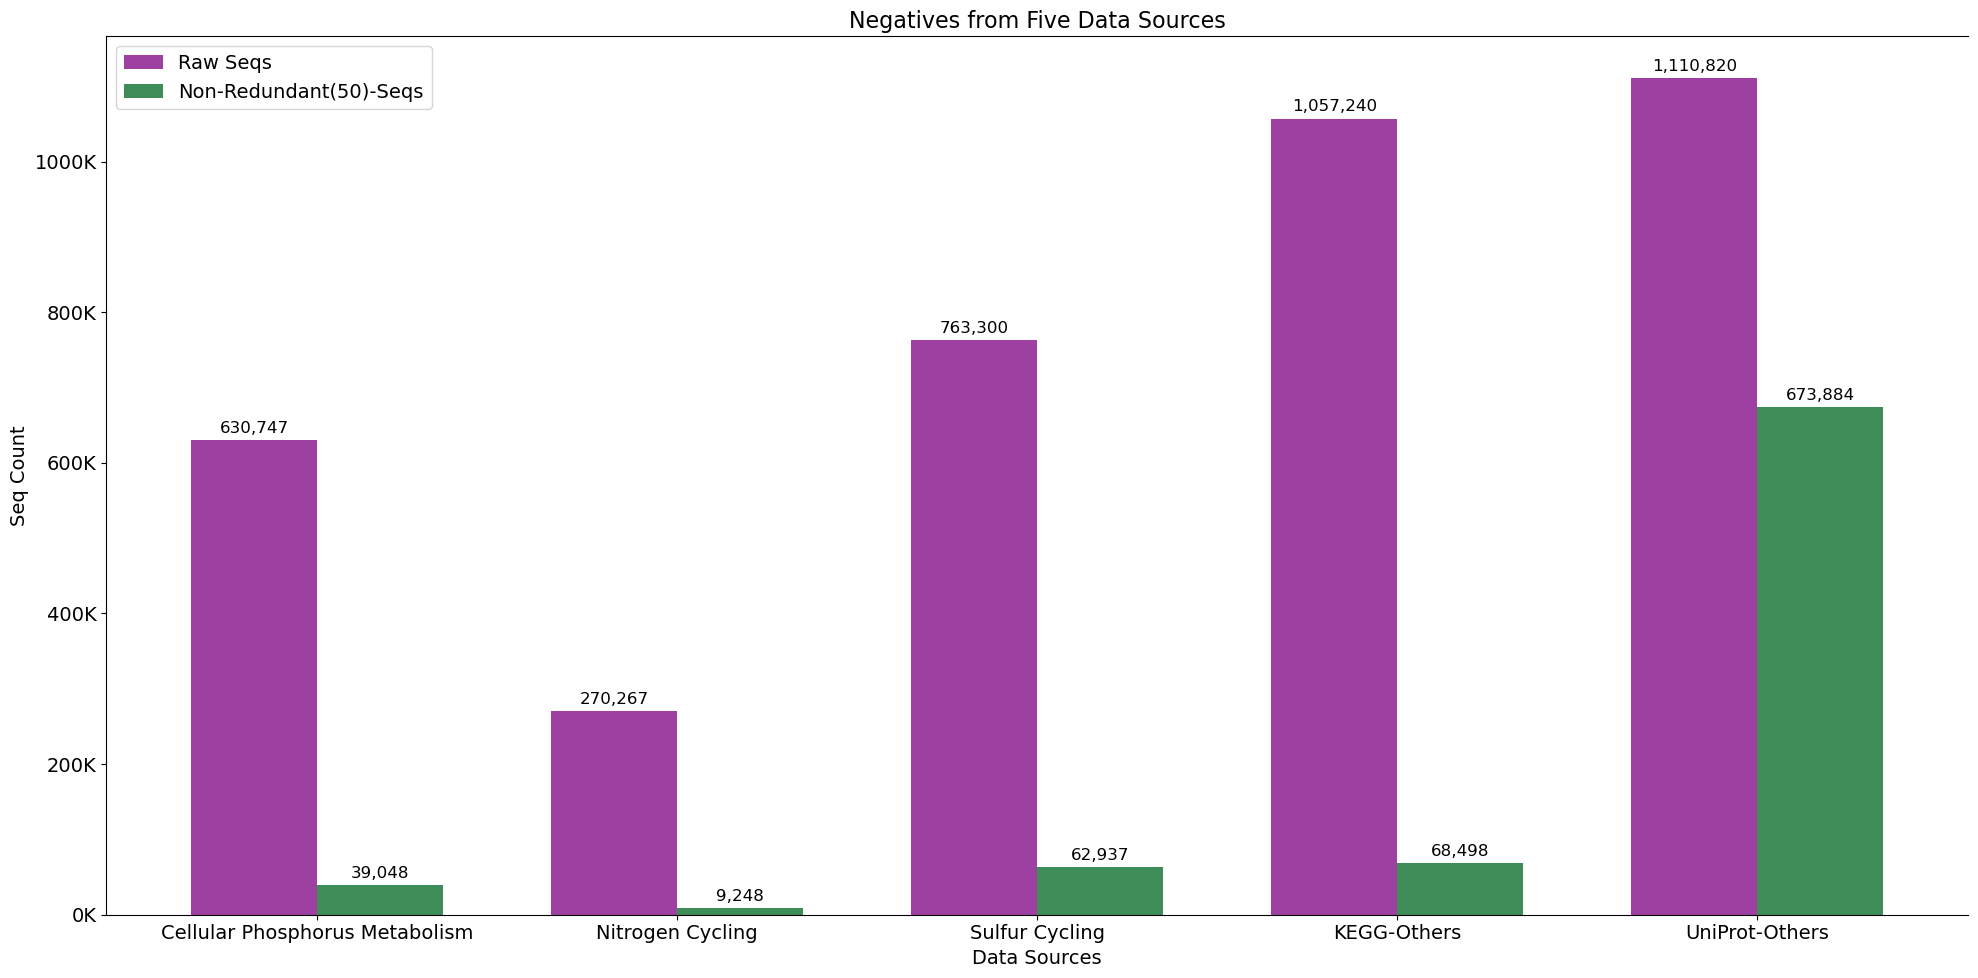

In [2]:
# 负样本分布
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.size'] = 14

labels = [
    "Cellular Phosphorus Metabolism", "Nitrogen Cycling", "Sulfur Cycling", "KEGG-Others", "UniProt-Others",
]
non_redundancy_data = [630747, 270267, 763300, 1057240, 1110820]
print("non_redundancy_data: %d" % sum(non_redundancy_data))
deredundancy_data = [39048, 9248, 62937, 68498, 673884]
print("deredundancy_data: %d" % sum(deredundancy_data))

x = np.arange(len(labels))  # 标签位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2, non_redundancy_data, width, label='Raw Seqs', color='#9E3FA2')
rects2 = ax.bar(x + width/2, deredundancy_data, width, label='Non-Redundant(50)-Seqs', color='#3E8D58')

ax.set_title('Negatives from Five Data Sources', fontsize=16)
ax.set_xlabel('Data Sources')
ax.set_ylabel('Seq Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# title_obj = plt.title('c.') 
# title_obj.set_position([-0.04, 1])
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                f'{height:,.0f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', 
                va='bottom',
                fontsize=12
        )

add_labels(rects1)
add_labels(rects2)

# plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 定义格式化函数
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# 应用格式化到y轴
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# 自动调整子图参数，使之填充整个图像
plt.tight_layout()  
plt.savefig("./pic/fig.lucapcycle_2_classification_dataset_stats.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_2_classification_dataset_stats.pdf", dpi=600,  format='pdf')

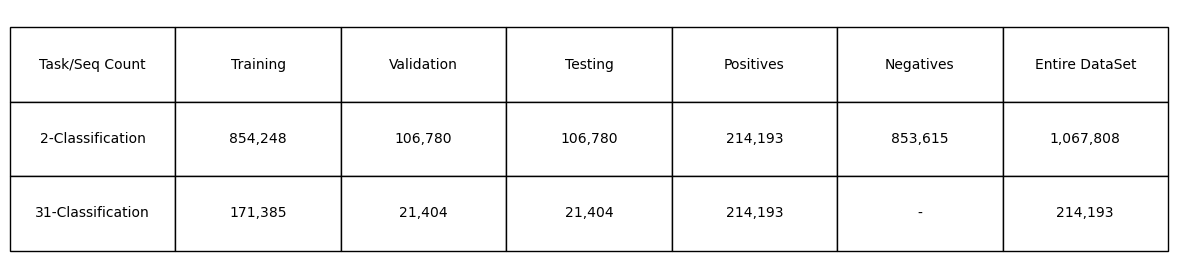

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


# 数据
data = [
    ['2-Classification', '854,248', '106,780', '106,780', '214,193', '853,615', '1,067,808'],
    ['31-Classification', '171,385', '21,404', '21,404', '214,193', '-', '214,193']
]
formatted_data = [[f'{value:.4f}' if isinstance(value, float) else value for value in row] for row in data]

# 列标
columns = ['Task/Seq Count', 'Training', 'Validation', 'Testing', 'Positives', 'Negatives', 'Entire DataSet']

# 创建图形和子图
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')

# 添加表格
the_table = ax.table(
        cellText=formatted_data, 
        colLabels=columns, 
        # rowLabels=rows, 
        cellLoc='center', 
        loc='center',
        rowLoc='center'
)
#plt.title("b.", y=0.95,loc='left', fontsize=10, color='black', fontweight="bold")
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 4) 
plt.axis('off')
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像
plt.savefig("./pic/fig.lucapcycle_classification_dataset_stats.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_classification_dataset_stats.pdf", dpi=600,  format='pdf')

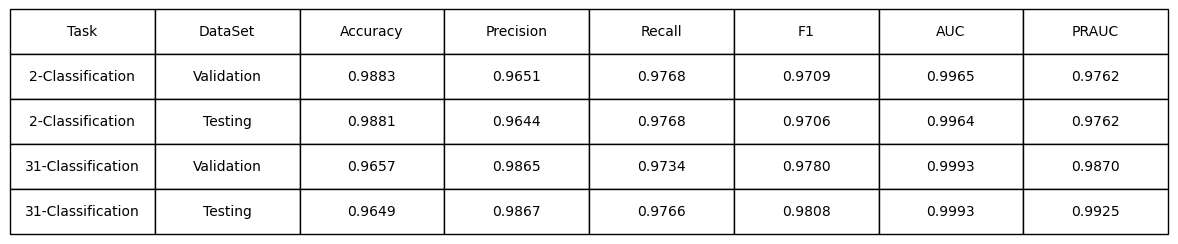

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.size'] = 14

# 数据
data = [
    ['2-Classification', 'Validation', 0.9883, 0.9651, 0.9768, 0.9709, 0.9965, 0.9762],
    ['2-Classification', 'Testing', 0.9881, 0.9644, 0.9768, 0.9706, 0.9964, 0.9762],
    ['31-Classification', 'Validation', 0.9657, 0.9865, 0.9734, 0.9780, 0.9993, 0.9870],
    ['31-Classification', 'Testing', 0.9649, 0.9867, 0.9766, 0.9808, 0.9993, 0.9925]
]

formatted_data = [[f'{value:.4f}' if isinstance(value, float) else value for value in row] for row in data]

# 列标
columns = ['Task', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'PRAUC']

# 创建图形和子图
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('tight')
ax.axis('off')

# 添加表格
the_table = ax.table(
    cellText=formatted_data, 
    colLabels=columns, 
    # rowLabels=rows, 
    cellLoc='center', 
    loc='center',
    rowLoc='center'
)
#plt.title("c.", y=1.24,loc='left', fontsize=10, color='black', fontweight="bold")
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 4) 
plt.axis('off')
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像
plt.savefig("./pic/fig.lucapcycle_classification_metrics.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_classification_metrics.pdf", dpi=600,  format='pdf')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



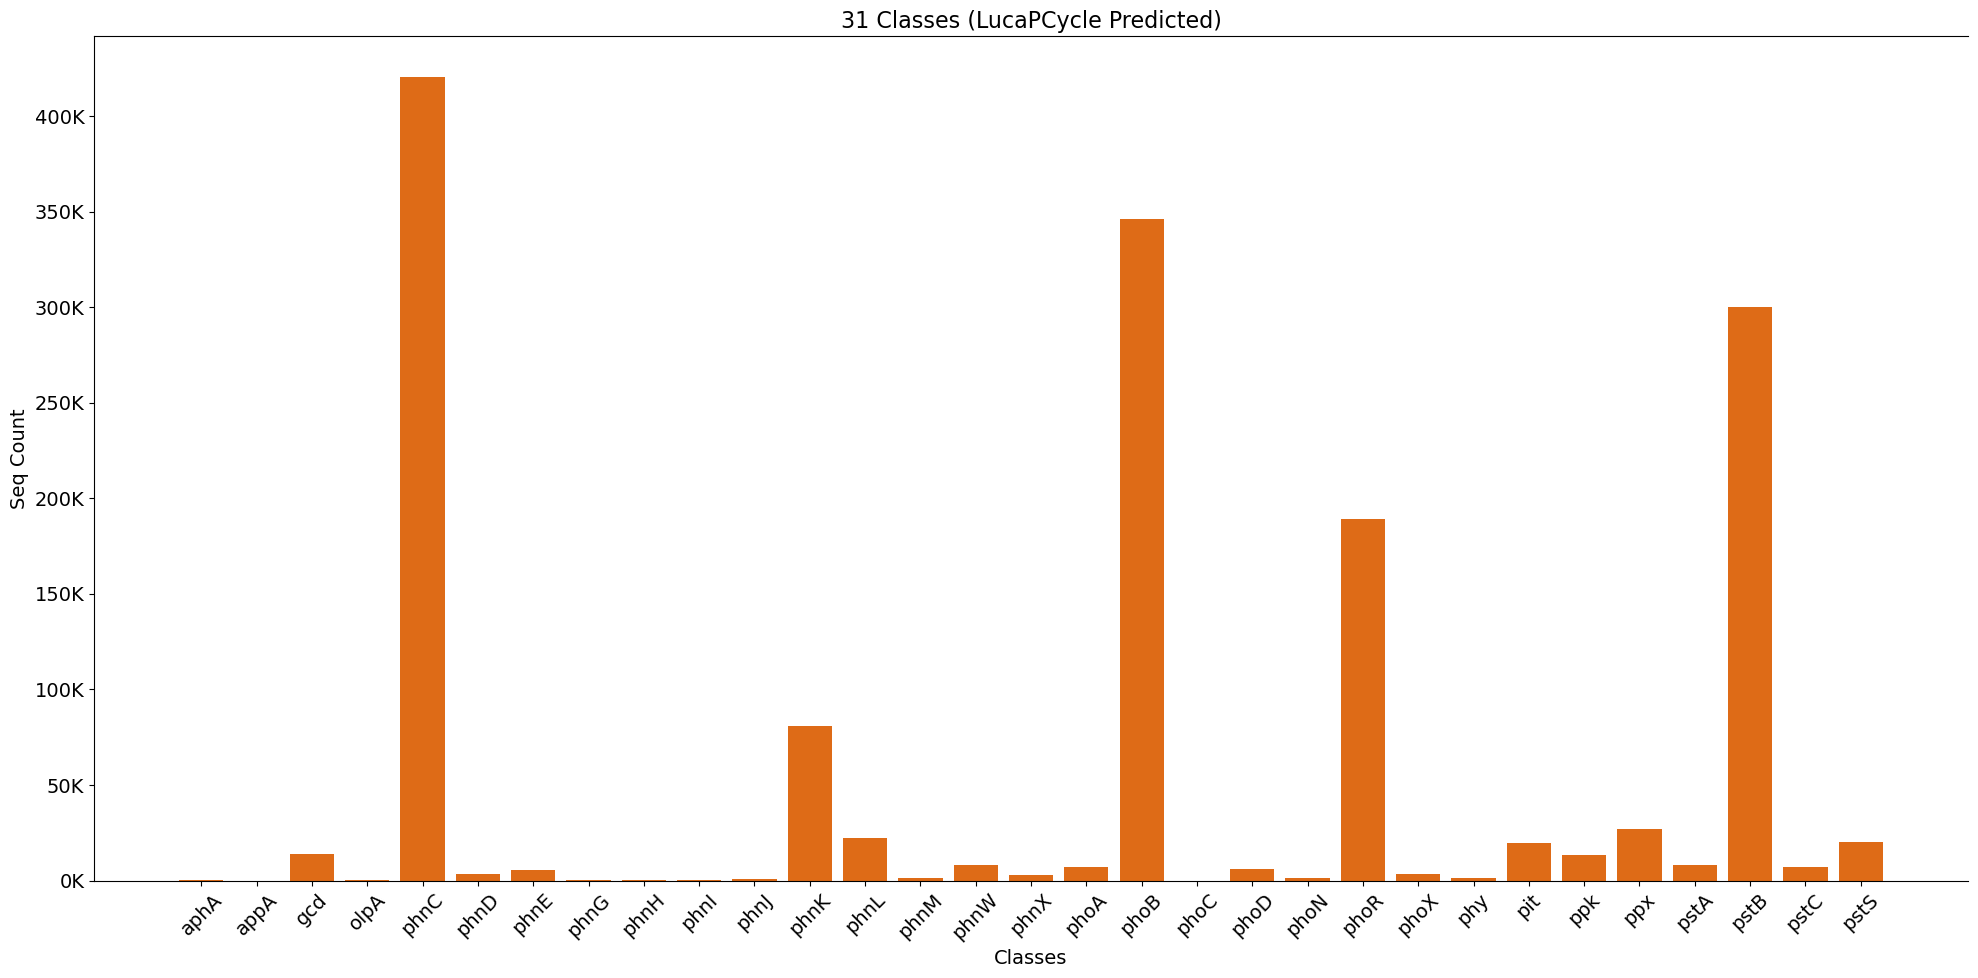

In [5]:
# AI预测的每一个类的数量
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.size'] = 14

labels = [
    "aphA", "appA", "gcd", "olpA", "phnC",
    "phnD", "phnE", "phnG", "phnH", "phnI",
    "phnJ", "phnK", "phnL", "phnM", "phnW", 
    "phnX", "phoA", "phoB", "phoC", "phoD", 
    "phoN", "phoR", "phoX", "phy", "pit", 
    "ppk", "ppx", "pstA", "pstB", "pstC", 
    "pstS"
]
data = [0] * len(labels)
predicted_filepath = "../Results/LucaPCycleV3/lucapcycle_v3_init.ids.labels"
with open(predicted_filepath, "r") as rfp:
    reader = csv.reader(rfp)
    cnt_idx = 0
    for row in reader:
        print(row)
        cnt_idx += 1
        if cnt_idx == 1:
            continue
        top1_label = row[1]
        label_idx = labels.index(top1_label)
        data[label_idx] += 1
print("total: %d" % sum(data))
print("details:")
details = {}
for idx, value in enumerate(data):
    details[labels[idx]] = value
print(details)
      

# 设置图形大小
plt.figure(figsize=(20, 10))

# 绘制柱状图
plt.bar(labels, data, color='#DE6B17')

# 添加标题和标签
plt.title('31 Classes (LucaPCycle Predicted)', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Seq Count')
# title_obj = plt.title('b.') 
# title_obj.set_position([-0.04, 1])
# 显示图表
plt.xticks(rotation=45)  # x轴标签旋转45度，以免重叠

# plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 定义格式化函数
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# 应用格式化到y轴
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# 自动调整子图参数，使之填充整个图像
plt.tight_layout()  
plt.savefig("./pic/fig.lucapcycle_predicted_positives_stats.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_predicted_positives_stats.pdf", dpi=600,  format='pdf')

verified precision:
[0.970302833642073, 0.9334794759129625, 0.7043789923869059]
precision:
[0.8612958078592808, 0.5824306406002338, 0.5197663392763073]
recall:
[0.8563061529950236, 0.9896462320247996, 0.35007536344629747]


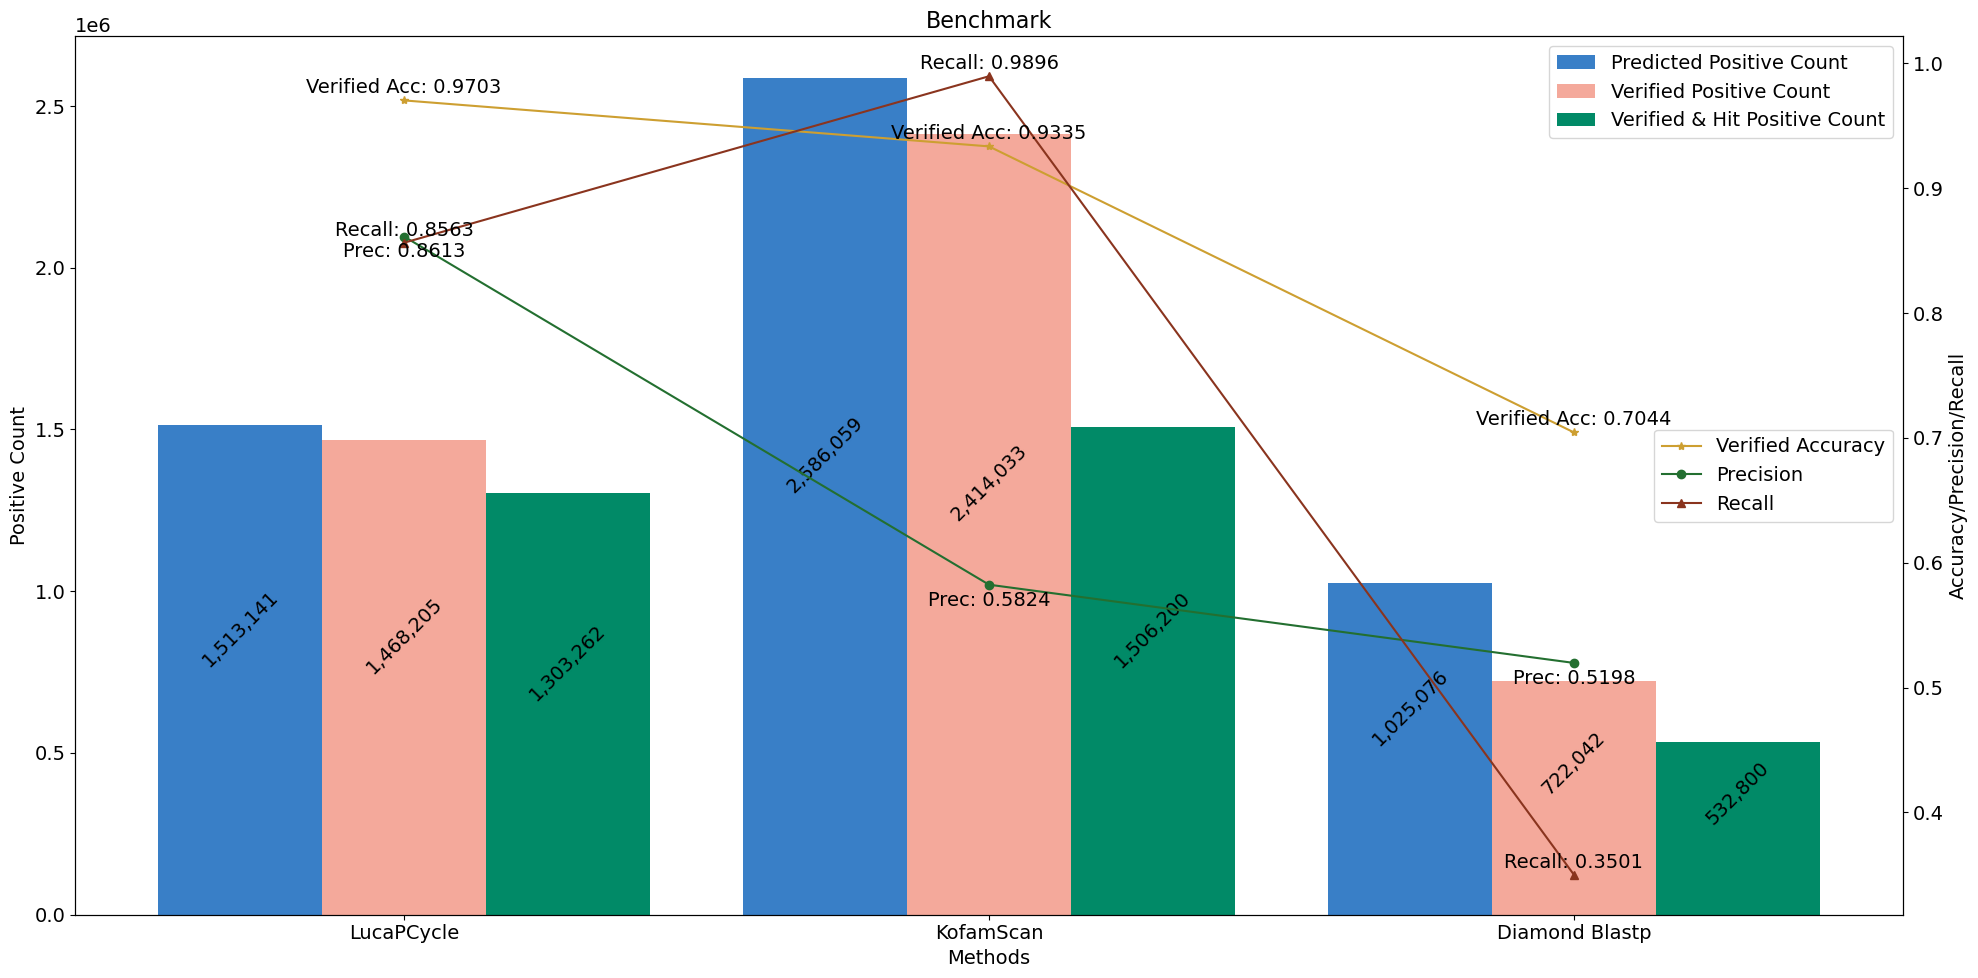

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.size'] = 14
      
x = np.arange(3)
predicted = [1513141, 2586059, 1025076]
verified = [1468205, 2414033, 722042]
verified_and_hit = [1303262, 1506200, 532800]
two_methods_verify_cnt = 1521958


# (Verified Positives/Predicted Positives)
verified_precision = [
    verified[0]/predicted[0], 
    verified[1]/predicted[1], 
    verified[2]/predicted[2], 
]
print("verified precision:")
print(verified_precision)

# (Verified & Hit Positives/Predicted Positives)
precision = [
    verified_and_hit[0]/predicted[0], 
    verified_and_hit[1]/predicted[1], 
    verified_and_hit[2]/predicted[2], 
]
print("precision:")
print(precision)
# (Verified & Hit Positives/Valified & Predicted by Two Methods)
recall = [
    verified_and_hit[0]/two_methods_verify_cnt, 
    verified_and_hit[1]/two_methods_verify_cnt, 
    verified_and_hit[2]/two_methods_verify_cnt
]
print("recall:")
print(recall)

# 设置柱子的位置和宽度
width = 0.28  # 柱子的宽度

# 创建图形和子图
fig, ax1 = plt.subplots(figsize=(20, 10))

colors = ["#cd9f31", "#236f30", "#8a341e"]
# colors = ["#E46788", "#4B7ED2", "#3E8D58"]
colors_bin = ["#397FC7", "#F4A99B", "#018A67"]
# 绘制柱状图
bars1 = ax1.bar(
    x - width, 
    predicted, 
    width, 
    label='Predicted Positive Count', 
    color=colors_bin[0], 
    zorder=0
)
bars2 = ax1.bar(
    x, 
    verified, 
    width, 
    label='Verified Positive Count', 
    color=colors_bin[1],
    zorder=0
)
bars3 = ax1.bar(
    x + width, 
    verified_and_hit, 
    width, 
    label='Verified & Hit Positive Count', 
    color=colors_bin[2], 
    zorder=0
)

# 在柱子上方添加y值
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2, 
            yval/2,
            f"{yval:,}", 
            ha='center', 
            va='bottom',
            rotation=45,
            zorder=2,
            fontsize=14
        )

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# 设置x轴标签
ax1.set_xticks(x)
ax1.set_xticklabels(['LucaPCycle', 'KofamScan', 'Diamond Blastp'])
ax1.set_xlabel('Methods')

# 设置第一个Y轴
ax1.set_ylabel('Positive Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建第二个y轴
ax2 = ax1.twinx()


# colors = ['#C53135', '#9E3FA2', '#3E8D58']
# 绘制曲线图
ax2.plot(
    x,
    verified_precision, 
    color=colors[0], 
    label='Verified Accuracy', 
    marker='*', 
    zorder=1
)
ax2.plot(
    x, 
    precision, 
    color=colors[1], 
    label='Precision', 
    marker='o', 
    zorder=1
)
ax2.plot(
    x, 
    recall, 
    color=colors[2], 
    label='Recall',
    marker='^', 
    zorder=1
)

# 设置第二个Y轴
ax2.set_ylabel('Accuracy/Precision/Recall', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 标注点
for (i, j) in zip(x, verified_precision):
    ax2.annotate(
        f"Verified Acc: {round(j, 4)}",
        (i, j), 
        textcoords="offset points", 
        xytext=(0, 5), 
        ha='center',
        zorder=2,
        fontsize=14
        
    )

for (i, j) in zip(x, precision):
    v = round(j, 2)
    ax2.annotate(
        f"Prec: {round(j, 4)}", 
        (i, j), 
        textcoords="offset points", 
        xytext=(0, -15), 
        ha='center',
        zorder=2,
        fontsize=14
    )

for (i, j) in zip(x, recall):
    ax2.annotate(
        f"Recall: {round(j, 4)}", (i, j),
        textcoords="offset points", xytext=(0, 5), 
        ha='center',
        zorder=2,
        fontsize=14
    )
    

# 添加标题
plt.title('Benchmark', fontsize=16)

# 添加图例
ax1.legend(
    loc='upper right',
    fontsize=14)
ax2.legend(
    loc='center right',
    fontsize=14)

fig.tight_layout()


# 显示图表
plt.savefig("./pic/fig.lucapcycle_benchmark.png", dpi=600,  format='png')
plt.savefig("./pic/fig.lucapcycle_benchmark.pdf", dpi=600,  format='pdf')